In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
df1=pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
df1 = df1.drop('id', axis=1)
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [3]:
df2=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df2 = df2.drop('id', axis=1)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df=df1.append(df2)
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df=df.dropna()
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
def feature_gender(df):
    df["gender"] = np.where((df["gender"] == "Male"),1,0)
    return df

def feature_ever_married(df):
    df["ever_married"] = np.where((df["ever_married"] == "Yes"),1,0)
    return df

def feature_Residence_type(df):
    df["Residence_type"] = np.where((df["Residence_type"] == "Urban"),1,0)
    return df

def feature_normalize(df):
    column=['age','avg_glucose_level','bmi']
    sc=StandardScaler()
    df[column]=sc.fit_transform(df[column])
    return df

def iloveu(df):
    feature_gender(df)
    feature_ever_married(df)
    feature_Residence_type(df)
    feature_normalize(df)
    return df


In [8]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['stroke','work_type','smoking_status'] 
x=df.drop(columns=categorical_cols,axis=1)
x=iloveu(x)

# encoder = OneHotEncoder(handle_unknown='ignore')
# encoder_df = pd.DataFrame(encoder.fit_transform(x[['work_type','smoking_status']]).toarray())
# x = x.join(encoder_df)
# x.drop('work_type', axis=1, inplace=True)
# x.drop('smoking_status',axis=1, inplace=True)
# x[categorical_cols] = x[categorical_cols].astype('category')
y=df.stroke

print(x[:10])
print(x.shape)
print(y.shape)

   gender       age  hypertension  heart_disease  ever_married  \
0       1 -0.633731             0              0             1   
1       1 -0.403606             0              0             1   
2       0  0.010618             0              0             1   
3       1  0.654968             0              0             1   
4       0 -0.817831             0              0             0   
5       0 -0.357581             0              0             1   
6       0  0.516893             0              0             1   
7       1  1.667516             0              1             1   
8       0  0.148693             0              0             1   
9       0  0.931117             0              0             1   

   Residence_type  avg_glucose_level       bmi  
0               1          -0.421613  0.398445  
1               0          -0.455756 -0.626963  
2               0           0.313542  1.708690  
3               1          -0.880811  0.070884  
4               0          -

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(16170, 8)
(16170,)
(4043, 8)
(4043,)


In [11]:
model=Sequential()
model.add(Dense(128, activation='relu',input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


2023-01-13 12:11:04.588564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 12:11:04.671645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 12:11:04.672397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 12:11:04.674438: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


node zero
2023-01-13 12:11:04.675503: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 12:11:04.676172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 12:11:06.568691: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 12:11:06.569547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 12:11:06.570263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

In [12]:
import keras
file_path = "weights_best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(file_path, monitor="val_accuracy", save_best_only=True, mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.9, patience=2, min_lr=1e-6, mode="max", verbose=True)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, mode="max", verbose=True)
callbacks_list = [checkpoint, reduce_lr]

2023-01-13 12:11:07.115129: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
130/130 [==============================] - 2s 4ms/step - loss: 0.6013 - accuracy: 0.7287 - val_loss: 0.4071 - val_accuracy: 0.9518
Epoch 2/50
130/130 [==============================] - 0s 3ms/step - loss: 0.2772 - accuracy: 0.9602 - val_loss: 0.2261 - val_accuracy: 0.9518
Epoch 3/50
130/130 [==============================] - 0s 3ms/step - loss: 0.1825 - accuracy: 0.9602 - val_loss: 0.1869 - val_accuracy: 0.9518

Epoch 00003: ReduceLROnPlateau reducing learning rate to 8.999999772640876e-05.
Epoch 4/50
130/130 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9602 - val_loss: 0.1717 - val_accuracy: 0.9518
Epoch 5/50
130/130 [==============================] - 0s 3ms/step - loss: 0.1464 - accuracy: 0.9602 - val_loss: 0.1643 - val_accuracy: 0.9518

Epoch 00005: ReduceLROnPlateau reducing learning rate to 8.100000122794882e-05.
Epoch 6/50
130/130 [==============================] - 0s 3ms/step - loss: 0.1402 - accuracy: 0.9602 - val_loss: 0.1595 - val_acc

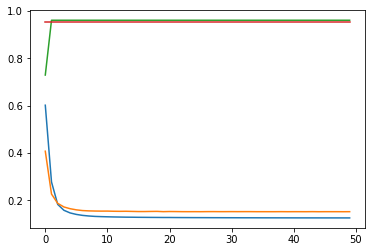

In [13]:
history=model.fit(x_train,y_train,batch_size=100,epochs=50,verbose=1,validation_split=0.2,callbacks=callbacks_list)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [14]:
score=model.evaluate(x_test,y_test)
print(score)

127/127 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9580
[0.13306275010108948, 0.9579520225524902]


In [15]:
test=pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
cols = ['work_type','smoking_status','id'] 
test_data=test.drop(columns=cols,axis=1)
test_data=iloveu(test_data)
print(test_data[5:10])
print(test_data.shape)

   gender       age  hypertension  heart_disease  ever_married  \
5       0  0.288160             0              0             1   
6       0 -0.138443             0              0             1   
7       0  0.477761             0              1             1   
8       0 -1.418250             0              0             0   
9       0  0.572562             0              0             1   

   Residence_type  avg_glucose_level       bmi  
5               1          -1.157630  0.632305  
6               0           0.272535 -0.496374  
7               0           0.537266  0.498646  
8               0          -0.293588 -0.139949  
9               0          -0.383504 -0.481523  
(10204, 8)


In [16]:
predict=model.predict(test_data)
print(predict[:10])
print(predict.shape)

[[3.8828596e-02]
 [1.7954743e-01]
 [3.7835202e-05]
 [2.4924375e-02]
 [2.2561764e-03]
 [9.6684126e-03]
 [5.3746477e-03]
 [5.0816990e-02]
 [5.8027083e-04]
 [2.3590153e-02]]
(10204, 1)


In [17]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['stroke'] = predict.reshape((predict.shape[0]))
submission.to_csv('submission.csv', index=False)
submission

,id,stroke
0,15304,0.038829
1,15305,0.179547
2,15306,0.000038
3,15307,0.024924
4,15308,0.002256
...,...,...
10199,25503,0.000331
10200,25504,0.014780
10201,25505,0.000048
10202,25506,0.001209
